<a href="https://colab.research.google.com/github/vyshali2419/NLP-2403A52028/blob/main/NLP_LAB_ASS_4(2403A52028_%2CBATCH_02).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import io

data = """tweet_id,text,airline_sentiment
1,@united This flight is terrible and delayed again,negative
2,@delta I love the service and friendly staff,positive
3,@usairways Worst experience ever!!! Never flying again,negative
4,@southwest Great flight and amazing crew,positive
5,@united Flight cancelled and no help from staff,negative
6,@delta The seat was uncomfortable and food was bad,negative
7,@southwest Smooth takeoff and pleasant journey,positive
8,@usairways Delayed for hours and rude service,negative
9,@united Happy with the quick boarding process,positive
10,@delta Terrible customer support and long delays,negative
"""

df = pd.read_csv(io.StringIO(data))
print(df.head())

   tweet_id                                               text  \
0         1  @united This flight is terrible and delayed again   
1         2       @delta I love the service and friendly staff   
2         3  @usairways Worst experience ever!!! Never flyi...   
3         4           @southwest Great flight and amazing crew   
4         5    @united Flight cancelled and no help from staff   

  airline_sentiment  
0          negative  
1          positive  
2          negative  
3          positive  
4          negative  


In [3]:
import pandas as pd
import re
import nltk
import spacy
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud


In [4]:
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
df.head()

,tweet_id,text,airline_sentiment
0,1,@united This flight is terrible and delayed again,negative
1,2,@delta I love the service and friendly staff,positive
2,3,@usairways Worst experience ever!!! Never flyi...,negative
3,4,@southwest Great flight and amazing crew,positive
4,5,@united Flight cancelled and no help from staff,negative


In [8]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)   # remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)        # remove mentions & hashtags
    text = text.lower()

    doc = nlp(text)
    tokens = [token.text for token in doc
              if token.text.isalpha() and token.text not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(preprocess_text)
df[["text", "clean_text"]].head()


,text,clean_text
0,@united This flight is terrible and delayed again,flight terrible delayed
1,@delta I love the service and friendly staff,love service friendly staff
2,@usairways Worst experience ever!!! Never flyi...,worst experience ever never flying
3,@southwest Great flight and amazing crew,great flight amazing crew
4,@united Flight cancelled and no help from staff,flight cancelled help staff


In [10]:
negative_tweets = df[df["airline_sentiment"] == "negative"]
negative_text = negative_tweets["clean_text"]


In [11]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(negative_text)

feature_names = tfidf.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray().sum(axis=0)

tfidf_df = pd.DataFrame({
    "term": feature_names,
    "score": tfidf_scores
}).sort_values(by="score", ascending=False)

tfidf_df.head(10)


,term,score
3,delayed,1.005253
7,flight,1.005253
19,terrible,0.956709
11,hours,0.521823
10,help,0.521823
1,cancelled,0.521823
16,service,0.521823
17,staff,0.521823
14,rude,0.521823
0,bad,0.500000


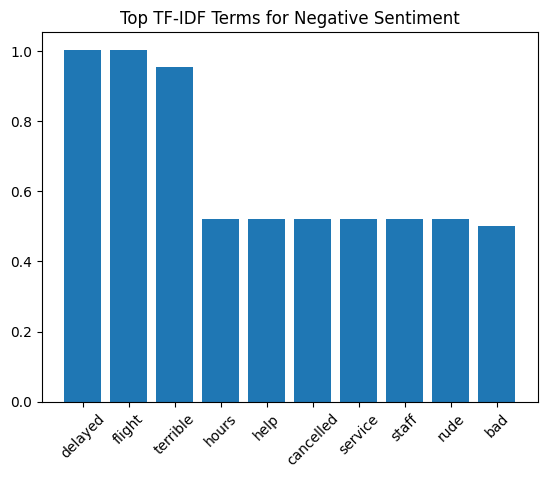

In [12]:
top_terms = tfidf_df.head(10)

plt.figure()
plt.bar(top_terms["term"], top_terms["score"])
plt.xticks(rotation=45)
plt.title("Top TF-IDF Terms for Negative Sentiment")
plt.show()


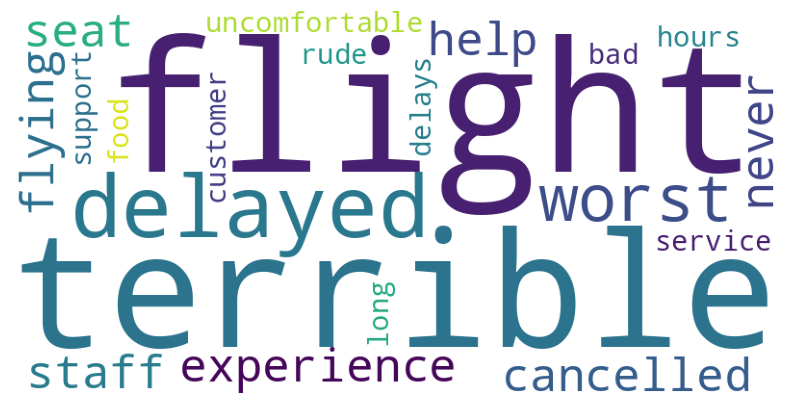

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color="white")
wordcloud.generate(" ".join(negative_text))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
